# PROJECT 1

### Simple Linear Regression and Gradient Decent

BY: MOHAMMAD HAQUE, KRIS YU, DAVID WINTER

In [258]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

housingInfo = pd.read_csv('housing/train.csv')
housingInfo = housingInfo.sort_values("SalePrice")

#Data to Analyze from main data############
lotArea = housingInfo['LotArea']
overallQ = housingInfo['OverallQual']
overallC = housingInfo['OverallCond']
yearB = housingInfo['YearBuilt']
yearR = housingInfo['YearRemodAdd']
############################################



#Price
price = housingInfo['SalePrice']

all = pd.DataFrame({
    "LotArea":lotArea,
    "YearB": yearB,
    "OverallQ": overallQ,
    "OverallC": overallC,
    "YearR": yearR,
    "Price": price,
})

all.sort_index(inplace=True)
all = (all-all.mean())/all.std()
features = pd.DataFrame({
    "LotArea":all["LotArea"],
    "YearB": all["YearB"],
    "OverallQ": all["OverallQ"],
    "OverallC": all["OverallC"],
    "YearR": all["YearR"]
    
})
price = all["Price"]

print(price.head())
#Graph Equations

0    0.347154
1    0.007286
2    0.535970
3   -0.515105
4    0.869545
Name: Price, dtype: float64


When we are starting with a dummy line we try and make it close to the line of best fit as possible through eyeballing. This is called bias, it is sometimes useful (especially in a simple case) but detremental on larger data sets.

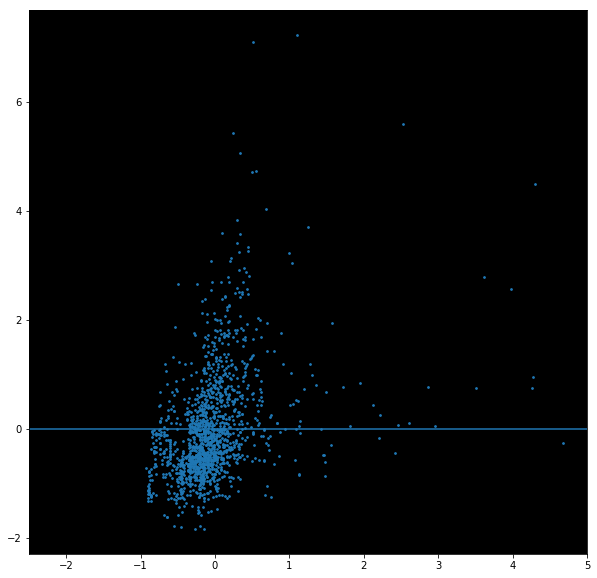

In [259]:
#lotArea Vs Price Model

X = all["LotArea"]
Y = price
n = lotArea.shape[0]
plt.figure(figsize=(10,10))
plt.scatter(X,Y,3)
plt.xlim(-2.5,5)
w = 0.
b = 0.
x = np.array(range(-10,10,1))
y = (w*x + b)
plt.plot(x,y)
plt.show()

In [260]:
#LOSS 
def getLoss(X,y,w,b):
    i = 0
    MSE = 0
    elements = X.shape[0]
    loss = np.array(range(0,elements))
    while i<X.shape[0]:
        MSE = MSE + (y[i] - (w*X[i]+b))**2
        i = i+1
    MSE = MSE/i
    return MSE

print(getLoss(features["YearB"],Y,w,b))

0.9993150684931503


In [268]:
# GRADIENT DECENT! (single variable)

def GradientDecent(w,b,X,y,learningRate,attempt):
    desc = 0
    err = []
    gw = []
    gb =[]
    while desc < attempt:
        yGuess = w * X + b
        wGrd = -(2/n) * sum(X * (Y - yGuess))
        bGrd =  -(2/n) * sum(Y - yGuess)

        newW = w - wGrd/learningRate
        newB = b - bGrd/learningRate
        gw.append(newW)
        gb.append(newB)
        err.append(mvLoss(X,Y,[newB,newW]))
        w = newW
        b = newB
        desc = desc + 1
    
    plt.figure(figsize=(10,10))
    plt.plot(range(0,attempt),err)
    plt.title('Cost VS Iteration',fontsize=25)
    plt.rcParams['axes.facecolor'] = 'black'
    plt.xlabel('Iteration', fontsize=14)
    plt.ylabel('Cost', fontsize=14)
    plt.show
    return [w,b]

In [327]:
def mvLoss(X,Y,W):
    X = X.values
    i = 0
    MSE = 0
    w = W[1:]
    b = W[0]
    while i < Y.size:
        if(X[i].size == 1):
            MSE = MSE + (Y[i] - (b + w[0]*X[i]))**2
        else:
            MSE = MSE + (Y[i] - (b + sum(w*X[i])))**2
        i = i +1
    MSE = MSE / Y.size
    return MSE

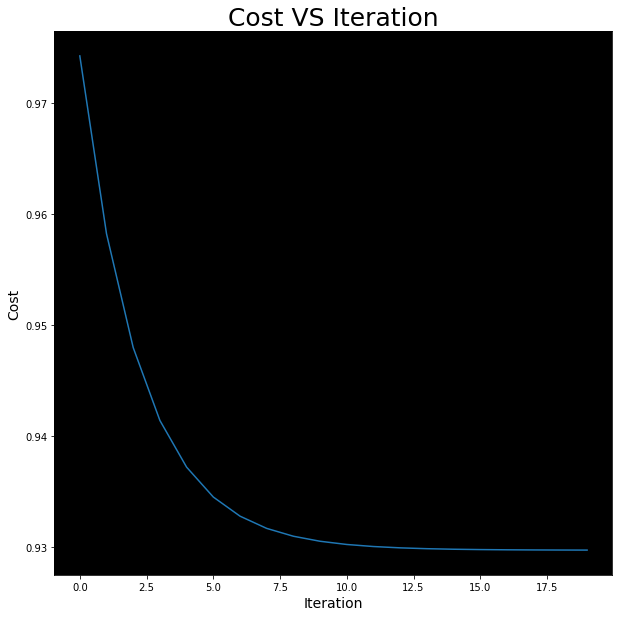

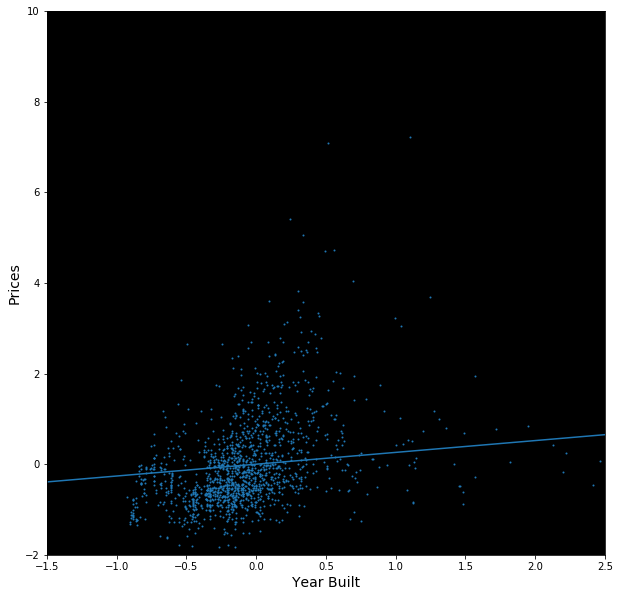

New w: 0.2607910126535431 New b: 1.4687642274407463e-16


In [340]:
X = features["LotArea"]
result = GradientDecent(0,0,X,Y,10,20)
w = result[0]
b = result[1]
plt.figure(figsize=(10,10))
plt.scatter(X,Y,1)
x = np.array(range(-10,10))
plt.xlim(-1.5,2.5)
plt.ylim(-2,10)
y = (w*x + b)
plt.xlabel('Year Built', fontsize=14)
plt.ylabel('Prices', fontsize=14)
plt.plot(x,y)
plt.show()
print("New w:",w,"New b:",b)

## Now lets look at the case of n features added to the linear regression model

The "line" of best fit can be given by the following formula. Technically it is not a line since it's in a dimension, higher than what we can preceve hence why we did the single dimension example.

$Y_{w}(x)= w_{0} + w_{1}x_{0} + ... + w_{n}x_{n}$

The mean square error represents the error that the "line" has in coreespond to the data. Using this following equation we can find the MSE of our line vs the data set.

$MSE =  \frac{1}{m}\sum_{i=1}^{m}(Y_{w}(x)-Y)^{2}$

Finally the main goal we want to do is to minimize the error. The best way to do this is to find the derivative of the MSE function and set that to equal to zero. The issue with that is that we have multiple variables that we have to decipher. This leads to us doing a partial derivative on the MSE function for each lable that we have. Then using a learning rate denoted by $\alpha$ we multiply the result and subtract from our original weight. The reason behind this is because the partial derivative tells us what direction we have to go to get to the minimum error. It however does not tell us how far we have to go to get there. If we decide to go at the rate given by the partial derivative we may over shoot the data and loose the minimum. If we take small steps however we may slowly approach the mininmum. This is the use of $\alpha$. 

$w_{j}:= w_{j} - \alpha \frac{2}{m}\sum_{i=1}^{m}(Y_{w}(x^{(i)})-Y^{(i)})x_{j}^{(i)}$

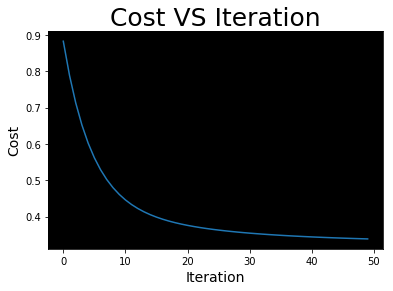

[-7.04935539e-16  1.93582680e-01  1.50265467e-01  5.51213179e-01
  1.42550409e-02  1.38693317e-01]


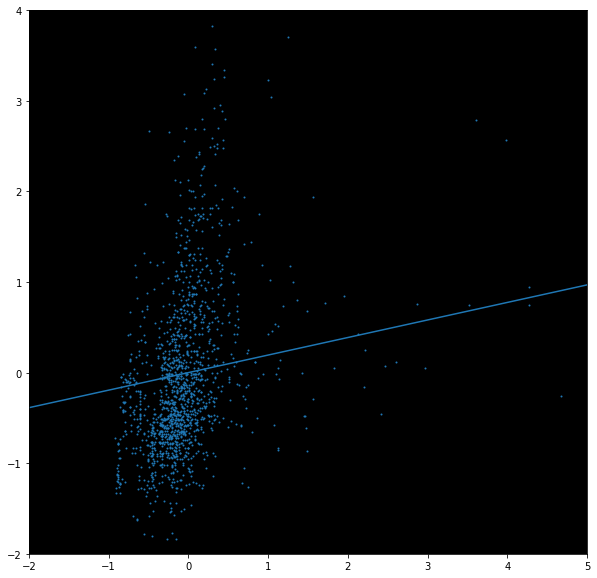

New w: 0.19358268014746227 New b: -7.049355391656965e-16


In [342]:
#GRADIENT DECENT WITH n VARIABLES
def gradientDecent(X,Y,W,FeatureNames,learningRate=40,attempt=50):
    XRow = X.values
    size = Y.size
    NewW = np.zeros(W.size)
    toTeachW = np.zeros(W.size)
    desc = 0
    lossA = []
    while desc < attempt:
        i = 0
        initW = NewW[0]
        WeightL = NewW[1:]
        guessY = []
        #GUESS Y WITH MODEL
        for x in XRow:
            guessY.append(initW + sum(x*WeightL))

        #GET THE NEW WEIGHT BASED ON EACH DERIVATIVE
        toTeachW[0] = (-2/size)*sum(guessY-Y)
        for f in FeatureNames:
            x = X[f]
            toTeachW[i+1] = (-2/size)*sum((guessY - Y)*x)
            i=i+1
        #ADJUST WEIGHT BASED ON THE LEARNING RATE
        NewW = NewW + toTeachW/learningRate
        desc = desc + 1
        lossA.append(mvLoss(X,Y, NewW)) ###
    plt.plot(range(0,attempt),lossA)
    plt.title('Cost VS Iteration',fontsize=25)
    plt.rcParams['axes.facecolor'] = 'black'
    plt.xlabel('Iteration', fontsize=14)
    plt.ylabel('Cost', fontsize=14)
    plt.show()
    return NewW
names = [
"LotArea",
"YearB",
"OverallQ",
"OverallC",
"YearR"
]

a =gradientDecent(features,price,np.array([1,1,1,1,1,1]),names)
print(a)
newW = a[1]
newB = a[0]
X = all["LotArea"]
plt.figure(figsize=(10,10))
plt.scatter(X,Y,1)
x = np.array(range(-10,50,1))
y = (newW*x + newB)
plt.xlim(-2,5)
plt.ylim(-2,4)
plt.plot(x,y)
plt.show()
print("New w:",newW,"New b:",newB)


Now lets see how well our model fairs against some test data.

-0.5997508166387062


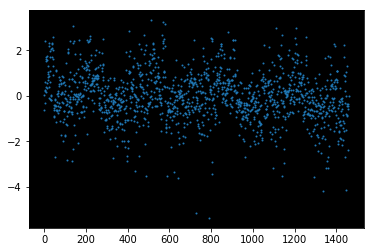

In [326]:
testingInfo = pd.read_csv('housing/test.csv')

#Data to Analyze from main data############
lotAreaT = testingInfo['LotArea']
overallQT = testingInfo['OverallQual']
overallCT = testingInfo['OverallCond']
yearBT = testingInfo['YearBuilt']
yearRT = testingInfo['YearRemodAdd']
############################################



#Price
result = pd.read_csv('housing/sample_submission.csv')
allT = pd.DataFrame({
    "LotArea":lotAreaT,
    "YearB": yearBT,
    "OverallQ": overallQT,
    "OverallC": overallCT,
    "YearR": yearRT,
    "SalePrice" : result["SalePrice"]
})

allT = (allT - allT.mean())/ allT.std()

testFeatures = pd.DataFrame({
    "LotArea":allT["LotArea"],
    "YearB": allT["YearB"],
    "OverallQ": allT["OverallQ"],
    "OverallC": allT["OverallC"],
    "YearR": allT["YearR"],
})
result =  allT["SalePrice"]

def calcFeature(w,x):
    return w[0] + sum(w[1:]*x)
print(result.values[0])

testFeatures = testFeatures.values
i = 0
guessCheck = np.zeros(result.size)
for tf in testFeatures:
    res = calcFeature(a,tf)
    guessCheck[i] = res
    i = i + 1
guessCheck = guessCheck - result
plt.scatter(range(0,guessCheck.size),guessCheck,1)
plt.show()

In [292]:

guessCheck = np.zeros(10)
guessCheck[1] = 1
guessCheck[1]


1.0